# Sesión Práctica 1

En esta sesión exploraremos:
- Configuración del entorno (limpieza, instalación de paquetes, carga de datos).
- Exploración y edición de datos (`stargazer`, `tidyverse`, filtrado y manipulación).
- Generación de series de tiempo con bucles.
- Simulación de series de tiempo y análisis de convergencia.

## 1. Configuración y Manipulación de Datos
Uno de los paquetes más usados para manipular datos es **tidyverse**. Para instalarlo y cargarlo en R, usamos:

In [1]:
# Instalar y cargar tidyverse
PackageNames <- c("tidyverse", "stargazer", "magrittr", "moments")
for (i in PackageNames) {
    if (!require(i, character.only = T)) {
        install.packages(i, dependencies = T)
        require(i, character.only = T)
    }
}

Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: stargazer


Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 


Loading required package: magrittr


Attaching package: 'magrittr'


The following object is masked from 'package:purrr':

    set_names


The following object is masked from 'package:tidyr':

    extract


Loading r

### Cargar y visualizar datos
Ejemplo con la base de datos integrada `mtcars`:

In [2]:
# Primeras filas del dataset
head(mtcars) 

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [3]:
# Estadísticas descriptivas de todas las variables
stargazer(mtcars, type = "text") 


Statistic N   Mean   St. Dev.  Min     Max  
--------------------------------------------
mpg       32 20.091   6.027   10.400 33.900 
cyl       32  6.188   1.786     4       8   
disp      32 230.722 123.939  71.100 472.000
hp        32 146.688  68.563    52     335  
drat      32  3.597   0.535   2.760   4.930 
wt        32  3.217   0.978   1.513   5.424 
qsec      32 17.849   1.787   14.500 22.900 
vs        32  0.438   0.504     0       1   
am        32  0.406   0.499     0       1   
gear      32  3.688   0.738     3       5   
carb      32  2.812   1.615     1       8   
--------------------------------------------


In [4]:
# Estadísticas descriptivas de las variables mpg y hp	
stargazer(mtcars[, c("mpg", "hp")], type = "text")


Statistic N   Mean   St. Dev.  Min    Max  
-------------------------------------------
mpg       32 20.091   6.027   10.400 33.900
hp        32 146.688  68.563    52    335  
-------------------------------------------


In [5]:
# Cambiar el nombre de variables
mtcars <- rename(
    mtcars,
    mil_per_gal = mpg,
    horse_pow = hp # primero se pone el nombre nuevo y luego el antiguo
)

In [6]:
# Estadísticas descriptivas de las variables mpg y hp con nombres cambiados
stargazer(select(
    mtcars,
    mil_per_gal, horse_pow
), type = "text")


Statistic   N   Mean   St. Dev.  Min    Max  
---------------------------------------------
mil_per_gal 32 20.091   6.027   10.400 33.900
horse_pow   32 146.688  68.563    52    335  
---------------------------------------------


## 2. Series de Tiempo

### 2.1 Crear manualmente una serie de tiempo
Podemos crear una serie de tiempo con la función `ts()`:

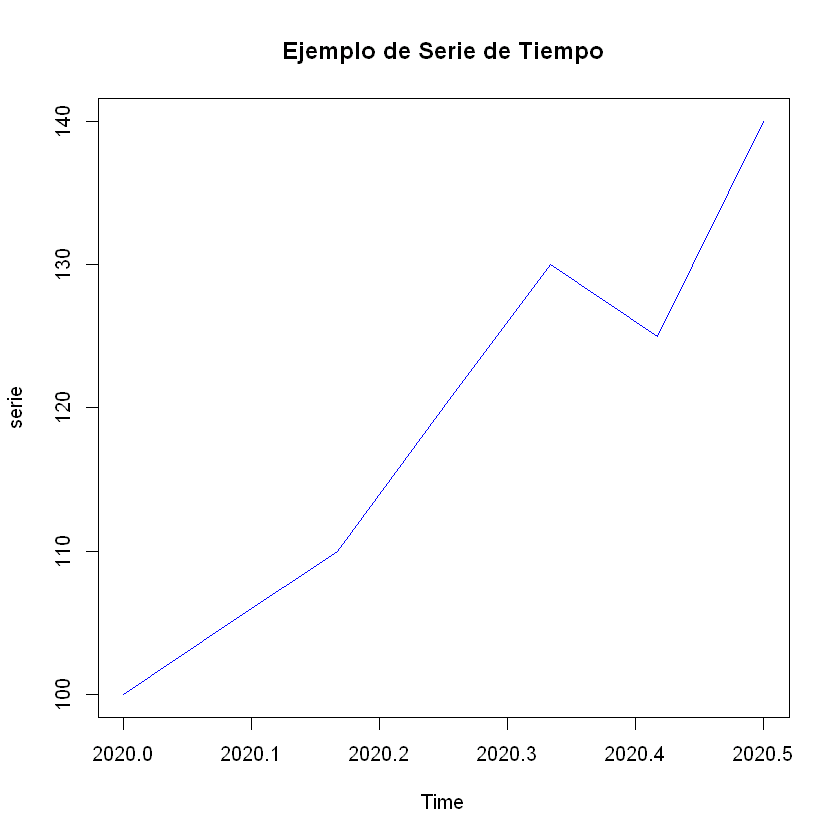

In [7]:
# Crear una serie de tiempo simple
datos <- c(100, 105, 110, 120, 130, 125, 140)
serie <- ts(datos, start = c(2020, 1), frequency = 12) # Datos mensuales
plot(serie, main = "Ejemplo de Serie de Tiempo", col = "blue")

### 2.2 Cargar una serie de tiempo Real
Podemos cargar una serie de tiempo económica desde R:

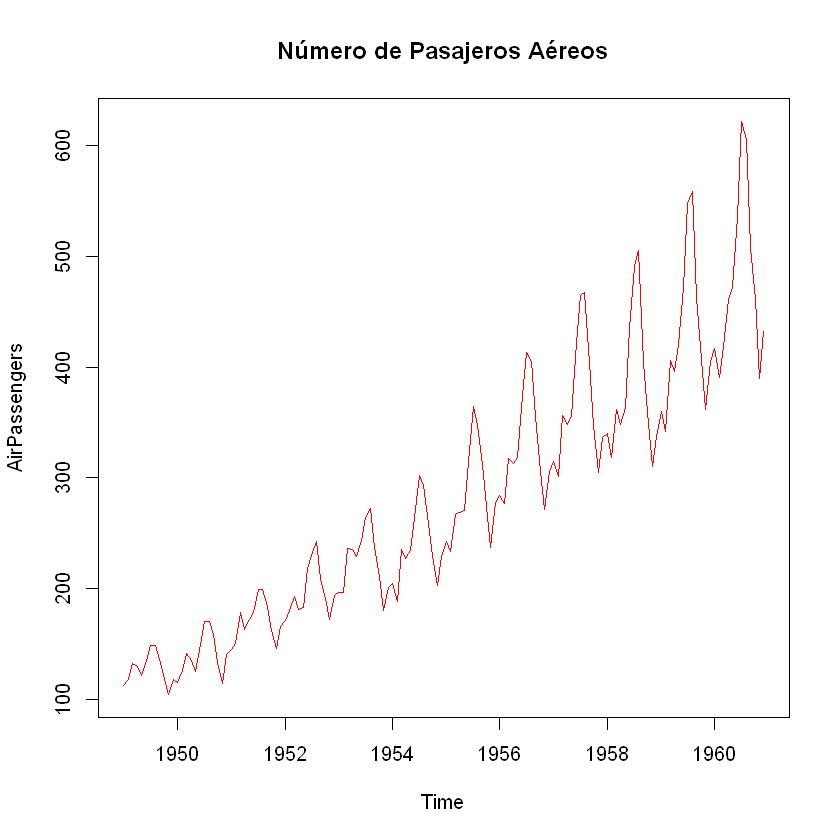

In [8]:
# Cargar datos de series de tiempo de AirPassengers
data(AirPassengers)
plot(AirPassengers, main = "Número de Pasajeros Aéreos", col = "red")

### 2.2.1 Descomposición de la serie de tiempo
Podemos descomponer una serie de tiempo en tendencia, estacionalidad y componente irregular:

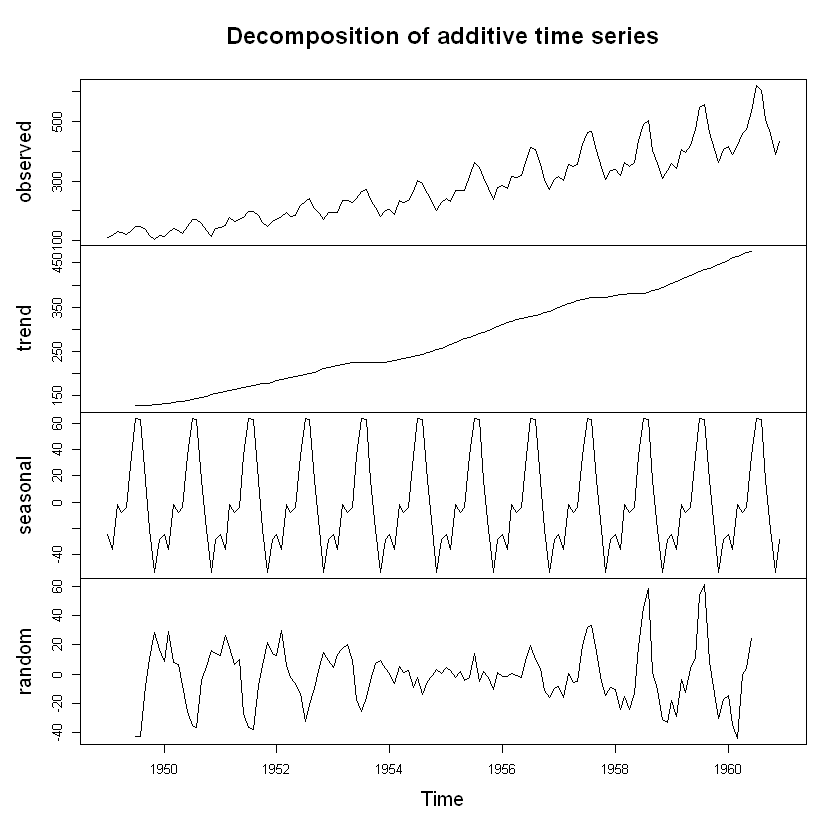

In [9]:
# Descomposición de la serie AirPassengers
descomposicion <- decompose(AirPassengers)
plot(descomposicion)

### 2.3 Generación de series de tiempo con bucles
Consideremos el siguiente proceso autoregresivo (Ecuación en diferencia de 1er orden): 
$$ y_t = a_0 + a_1 y_{t-1} + \varepsilon_t \tag{1}$$

Sabemos que la solución está dada por:
$$ y_t = a_0 \sum_{i=0}^{t-1} a_1^i + a_1^t y_0 + \sum_{i=0}^{t-1} a_1^i \varepsilon_{t-i} $$

Donde:
- $a_0$ es el intercepto
- $a_1$ es el coeficiente de persistencia.
- $\varepsilon_t \sim N(0, \sigma^2) $ es el término de error.

Simulemos una serie de tiempo AR(1)*, es decir, la ecuación (1):

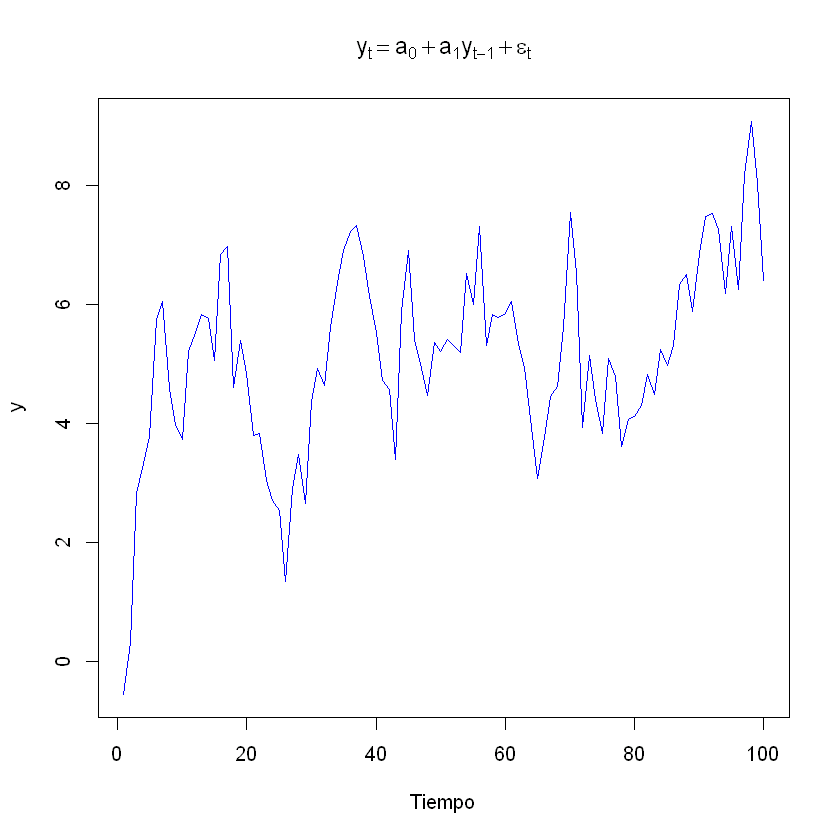

In [10]:
set.seed(123) # Para reproducibilidad
n <- 100 # Número de observaciones
a0 <- 1 # Intercepto
a1 <- 0.8 # Persistencia

y <- numeric(n)
epsilon <- rnorm(n, mean = 0, sd = 1) # Errores aleatorios con distribución normal

# Inicializamos la serie
y[1] <- epsilon[1]

# Generamos la serie con un loop
for (t in 2:n) {
    y[t] <- a0 + a1 * y[t - 1] + epsilon[t]
}

# Graficamos la serie generada
plot(y,
    type = "l",
    main = expression(y[t] == a[0] + a[1] * y[t - 1] + epsilon[t]), 
    col = "blue",
    xlab = "Tiempo",
    ylab = "y"
)

### 2.3.1 Modificación de parámetros en la simulación
Podemos cambiar el valor de $a_1 $ para ver cómo afecta la convergencia de la serie.

- Si $ |a_1| < 1 $, la serie es **estacionaria** y converge a la media.
- Si $ |a_1| > 1 $, la serie es **explosiva**.
- Si $ a_1 = 1 $, la serie es un **random walk**.

#### Panel (a): $y_t = 0.9 y_{t-1} + \varepsilon_t$

Si $a_0 = 0$ y $a_1 = 0.9$ en la ecuación (1)


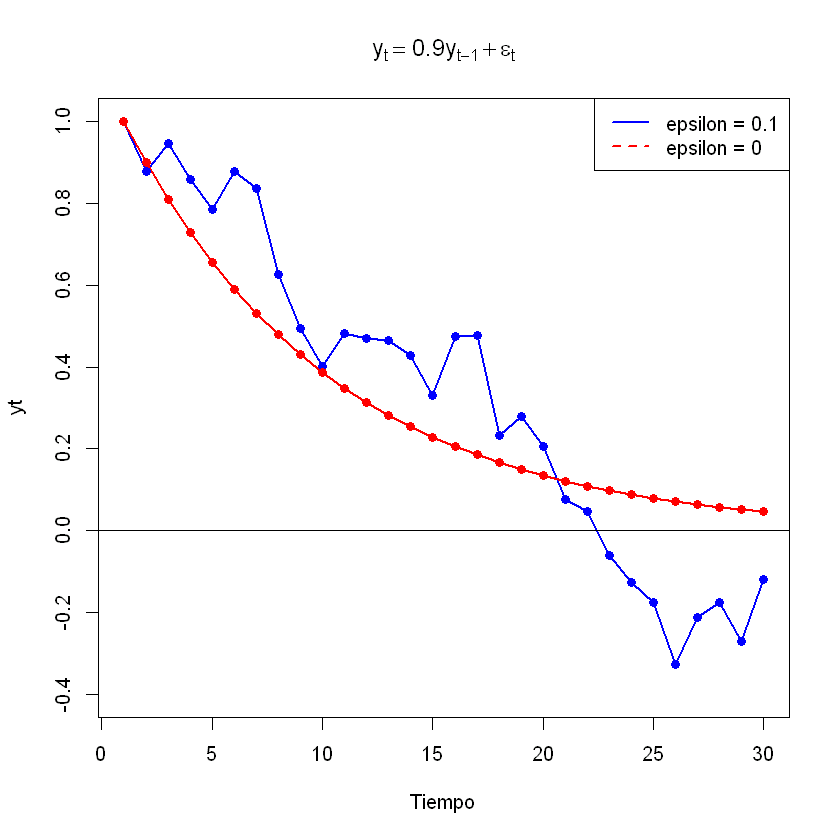

In [ ]:
# Simulación de un proceso AR(1) con y_0 = 1
set.seed(123) # Para reproducibilidad
n <- 30 # Número de observaciones
a1 <- 0.9 # Parámetro autoregresivo
y <- numeric(n)
y2 <- numeric(n)
epsilon <- rnorm(n, mean = 0, sd = 0.1) # Errores aleatorios con media 0
epsilon2 <- rnorm(n, mean = 0, sd = 0) 

# Inicializamos las series con y_0 = 1
y[1] <- 1
y2[1] <- 1

# Generamos la secuencia de y_t
for (t in 2:n) {
    y[t] <- a1 * y[t - 1] + epsilon[t]
    y2[t] <- a1 * y2[t - 1] + epsilon2[t]
}

# Graficamos ambas series
plot(1:n, y,
    type = "l", lwd = 2, col = "blue",
    main = expression(y[t] == 0.9 * y[t - 1] + epsilon[t]),
    xlab = "Tiempo", ylab = "yt",
    ylim = c(-0.4, 1)
) 

# Segunda serie en línea roja discontinua
lines(1:n, y2, col = "red", lwd = 2, lty = 1) 

# Agregar puntos a cada serie
points(1:n, y, pch = 19, col = "blue")
points(1:n, y2, pch = 19, col = "red")

# Línea de referencia en 0
abline(h = 0, col = "black", lty = 1)

# Agregar leyenda para diferenciar las series
legend("topright",
    legend = c("epsilon = 0.1", "epsilon = 0"),
    col = c("blue", "red"), lwd = 2, lty = c(1, 2)
)


### Panel (b): $y_t = 0.5 y_{t-1} + \varepsilon_t$

Si $a_0 = 0$ y $a_1 = 0.5$ en la ecuación (1)

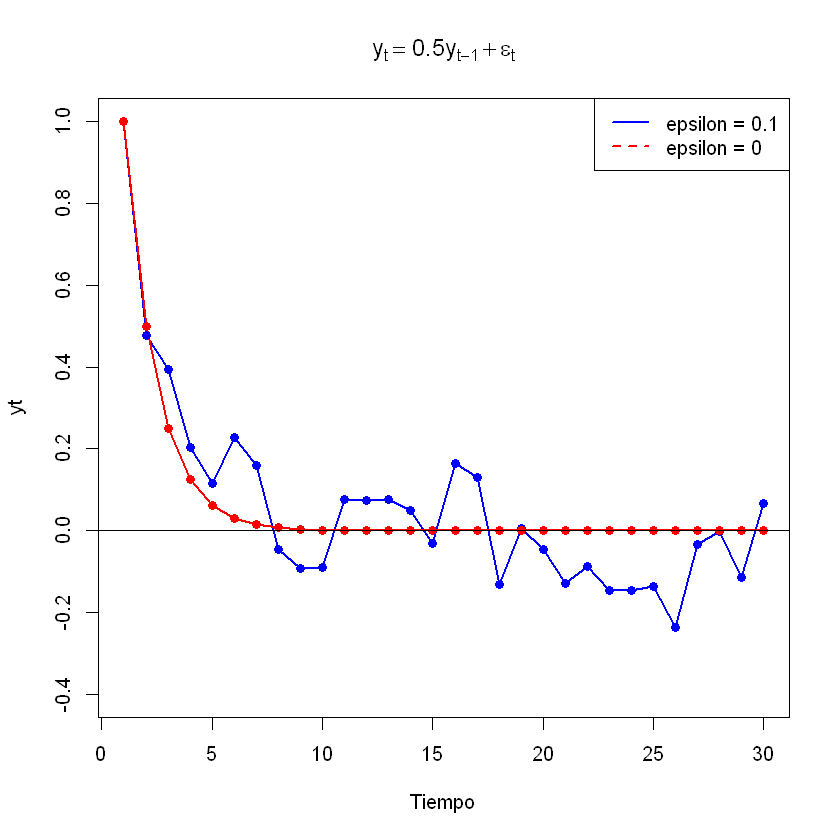

In [ ]:
# Simulación de un proceso AR(1) con y_0 = 1
set.seed(123) # Para reproducibilidad
n <- 30 # Número de observaciones
a1 <- 0.5 # Parámetro autoregresivo
y <- numeric(n)
y2 <- numeric(n)

# Errores aleatorios distribuidos normalmente 
epsilon <- rnorm(n, mean = 0, sd = 0.1) 
epsilon2 <- rnorm(n, mean = 0, sd = 0)

# Inicializamos las series con y_0 = 1
y[1] <- 1
y2[1] <- 1

# Generamos la secuencia de y_t
for (t in 2:n) {
    y[t] <- a1 * y[t - 1] + epsilon[t]
    y2[t] <- a1 * y2[t - 1] + epsilon2[t]
}

# Graficamos ambas series
plot(1:n, y,
    type = "l", lwd = 2, col = "blue",
    main = expression(y[t] == 0.5 * y[t - 1] + epsilon[t]),
    xlab = "Tiempo", ylab = "yt",
    ylim = c(-0.4, 1)
) 

# Segunda serie en línea roja
lines(1:n, y2, col = "red", lwd = 2, lty = 1)

# Agregar puntos a cada serie
points(1:n, y, pch = 19, col = "blue")
points(1:n, y2, pch = 19, col = "red")

# Línea de referencia en 0
abline(h = 0, col = "black", lty = 1)

# Agregar leyenda para diferenciar las series
legend("topright",
    legend = c("epsilon = 0.1", "epsilon = 0"),
    col = c("blue", "red"), lwd = 2, lty = c(1, 2)
)


Ambos gráficos juntos:

$y_t = 0.9 y_{t-1} + \varepsilon_t$ 

$y_t = 0.5 y_{t-1} + \varepsilon_t$

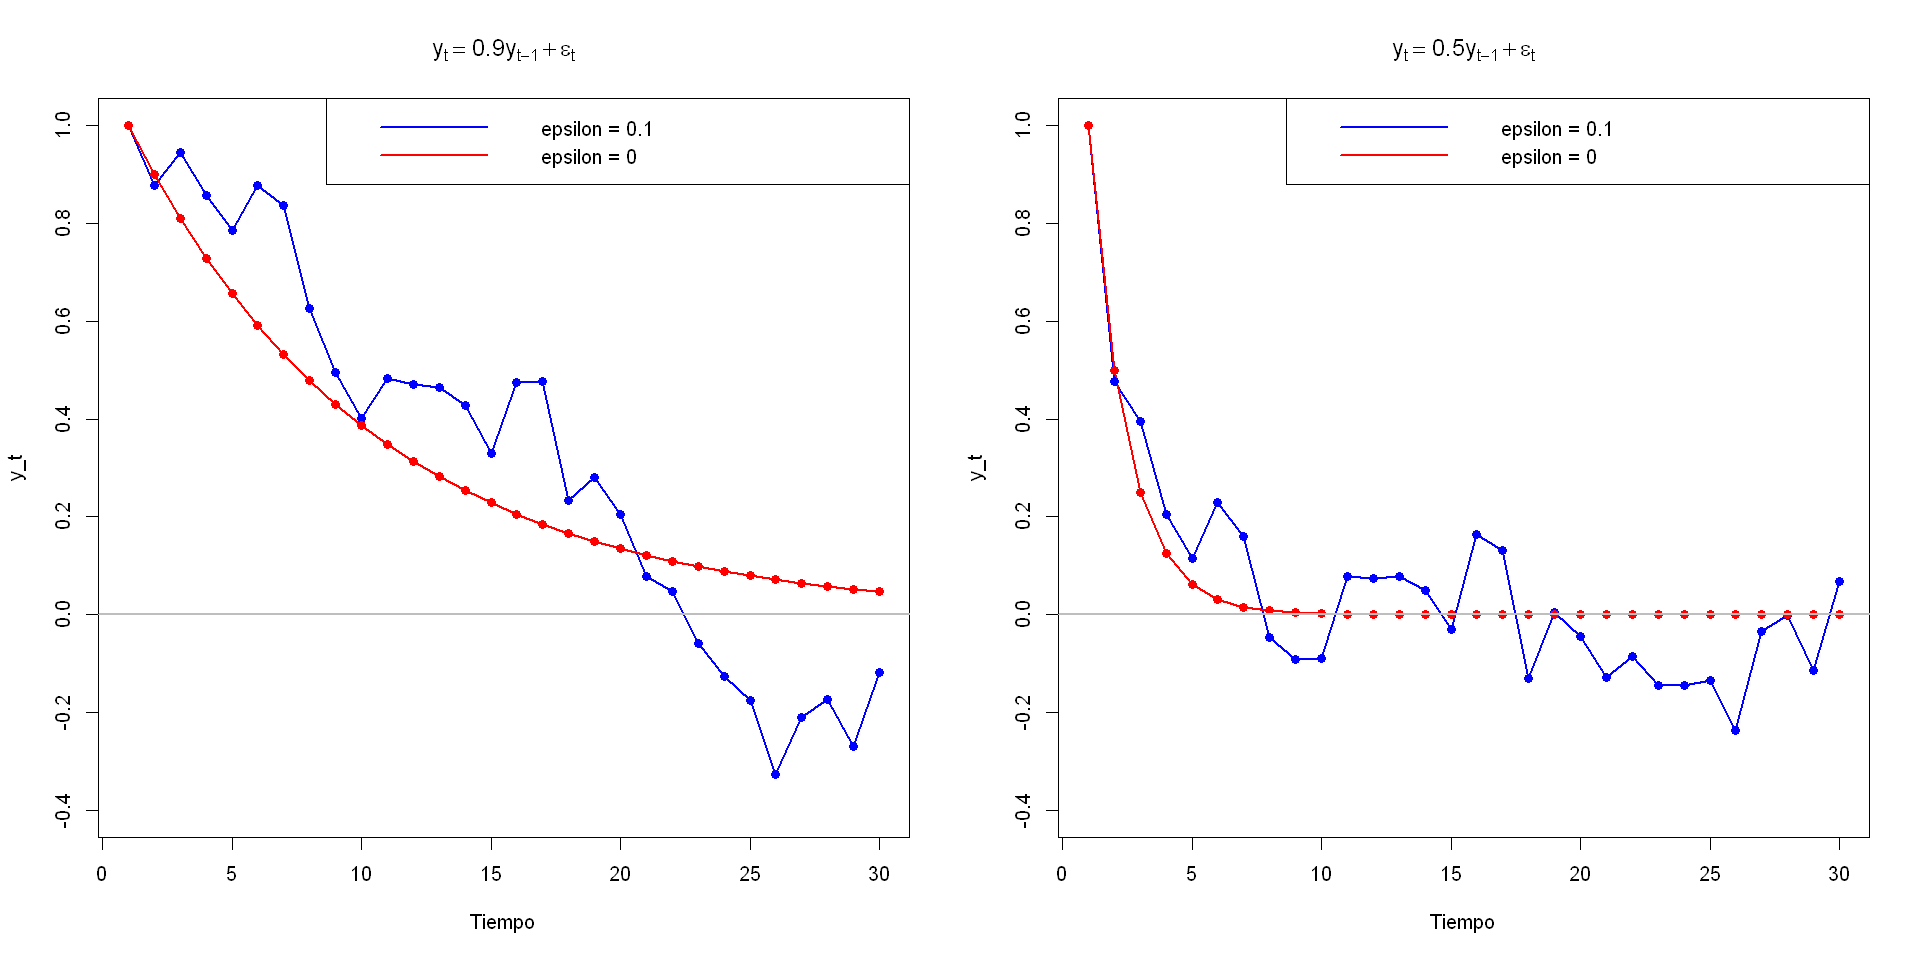

In [17]:
# Comparación de series con diferentes valores de a1
a1_values <- c(0.9, 0.5)
series_list <- list()
series_list2 <- list() 

for (a in a1_values) {
    y <- numeric(n)
    y2 <- numeric(n)

    y[1] <- 1
    y2[1] <- 1

    for (t in 2:n) {
        y[t] <- a * y[t - 1] + epsilon[t]
        y2[t] <- a * y2[t - 1] + epsilon2[t]
    }
    series_list[[as.character(a)]] <- y
    series_list2[[as.character(a)]] <- y2 
}

# Ajustar tamaño del gráfico 
options(repr.plot.width = 16, repr.plot.height = 8)

# Configurar gráficos en 1 fila y 2 columnas
par(mfrow = c(1, 2))

for (a in a1_values) {
    # Crear título
    titulo <- substitute(y[t] == a * y[t - 1] + epsilon[t], list(a = a))

    # Graficar serie 1
    plot(1:n, series_list[[as.character(a)]],
        type = "l",
        main = titulo, 
        col = "blue",
        lwd = 2,
        xlab = "Tiempo",
        ylab = "y_t",
        ylim = c(-0.4, 1)
    ) 

    # Graficar serie 2
    lines(1:n, series_list2[[as.character(a)]], col = "red", lwd = 2, lty = 1)
    
    # Agregar puntos a cada serie
    points(1:n, series_list[[as.character(a)]], pch = 19, col = "blue")
    points(1:n, series_list2[[as.character(a)]], pch = 19, col = "red")

    # Línea horizontal en y = 0
    abline(h = 0, col = "gray", lty = 1, lwd = 2)

    # Agregar leyenda
    legend("topright",
        legend = c("epsilon = 0.1", "epsilon = 0"),
        col = c("blue", "red"), lwd = 2, lty = c(1, 1)
    )
}



### Panel (c): $y_t = -0.5 y_{t-1} + \varepsilon_t$

Si $a_0 = 0$ y $a_1 = -0.5$ en la ecuación (1)

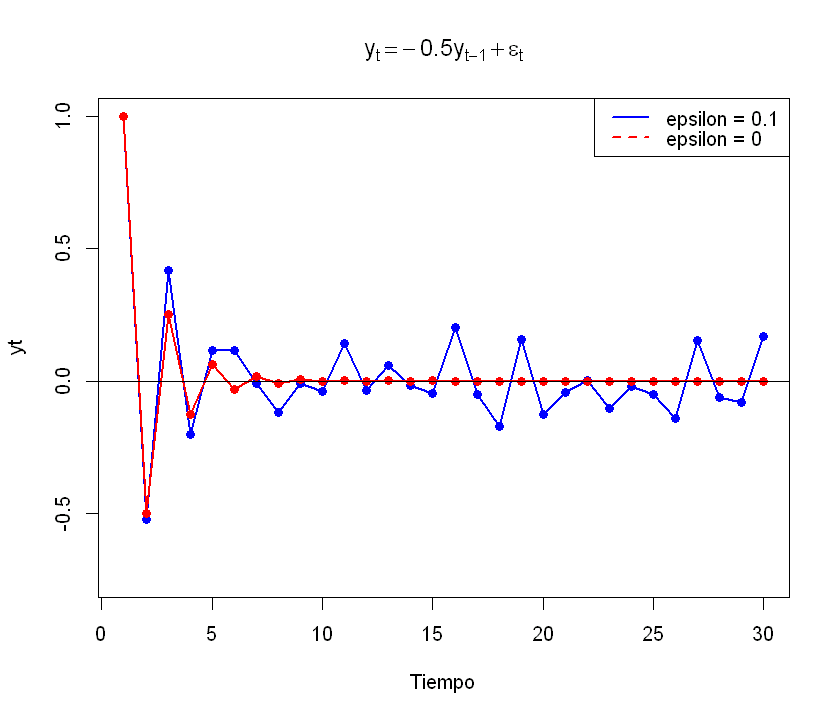

In [ ]:
# Simulación de un proceso AR(1) con y_0 = 1
set.seed(123) # Para reproducibilidad
n <- 30 # Número de observaciones
a1 <- -0.5 # Parámetro autoregresivo
y <- numeric(n)
y2 <- numeric(n)
epsilon <- rnorm(n, mean = 0, sd = 0.1) # Errores aleatorios con media 0
epsilon2 <- rnorm(n, mean = 0, sd = 0)

# Inicializamos las series con y_0 = 1
y[1] <- 1
y2[1] <- 1

# Generamos la secuencia de y_t
for (t in 2:n) {
    y[t] <- a1 * y[t - 1] + epsilon[t]
    y2[t] <- a1 * y2[t - 1] + epsilon2[t]
}

# Ajustar tamaño del gráfico
options(repr.plot.width = 7, repr.plot.height = 6)

# Graficamos ambas series
plot(1:n, y,
    type = "l", lwd = 2, col = "blue",
    main = expression(y[t] == -0.5 * y[t - 1] + epsilon[t]),
    xlab = "Tiempo", ylab = "yt",
    ylim = c(-0.75, 1)
) 

# Segunda serie en línea roja discontinua
lines(1:n, y2, col = "red", lwd = 2, lty = 1)

# Agregar puntos a cada serie
points(1:n, y, pch = 19, col = "blue")
points(1:n, y2, pch = 19, col = "red")

# Línea de referencia en 0
abline(h = 0, col = "black", lty = 1)

# Agregar leyenda para diferenciar las series
legend("topright",
    legend = c("epsilon = 0.1", "epsilon = 0"),
    col = c("blue", "red"), lwd = 2, lty = c(1, 2)
)


### Panel (d): $y_t = y_{t-1} + \varepsilon_t$

Si $a_0 = 0$ y $a_1 = 1$ en la ecuación (1)

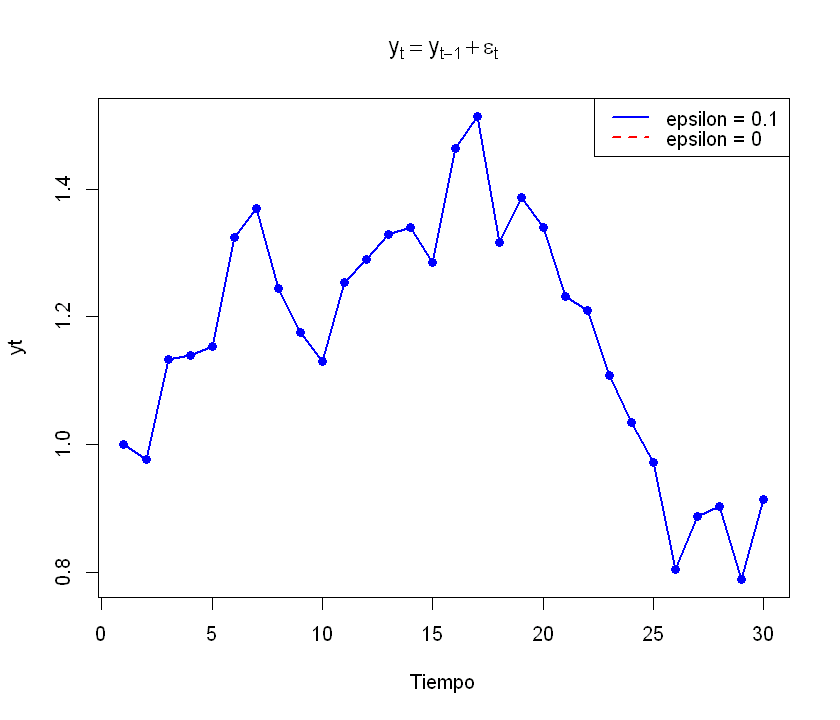

In [ ]:
# Simulación de un proceso AR(1) con y_0 = 1
set.seed(123) # Para reproducibilidad
n <- 30 # Número de observaciones
a1 <- 1 # Parámetro autoregresivo
y <- numeric(n)
y2 <- numeric(n)
epsilon <- rnorm(n, mean = 0, sd = 0.1) # Errores aleatorios con media 0
epsilon2 <- rnorm(n, mean = 0, sd = 0)

# Inicializamos las series con y_0 = 1
y[1] <- 1
y2[1] <- 1

# Generamos la secuencia de y_t
for (t in 2:n) {
    y[t] <- a1 * y[t - 1] + epsilon[t]
    y2[t] <- a1 * y2[t - 1] + epsilon2[t]
}

# Ajustar tamaño del gráfico
options(repr.plot.width = 7, repr.plot.height = 6)

# Graficamos ambas series
plot(1:n, y,
    type = "l", lwd = 2, col = "blue",
    main = expression(y[t] == y[t - 1] + epsilon[t]),
    xlab = "Tiempo", ylab = "yt"
)

# Agregar puntos a cada serie
points(1:n, y, pch = 19, col = "blue")

# Línea de referencia en 0
abline(h = 0, col = "black", lty = 1)

# Agregar label
legend("topright",
    legend = c("epsilon = 0.1", "epsilon = 0"),
    col = c("blue", "red"), lwd = 2, lty = c(1, 2)
)


### Panel (e): $y_t = 1.2 y_{t-1} + \varepsilon_t$

Si $a_0 = 0$ y $a_1 = 1.2 $ en la ecuación (1)

### Panel (f): $y_t = -1.2 y_{t-1} + \varepsilon_t$

Si $a_0 = 0$ y $a_1 = -1.2 $ en la ecuación (1)

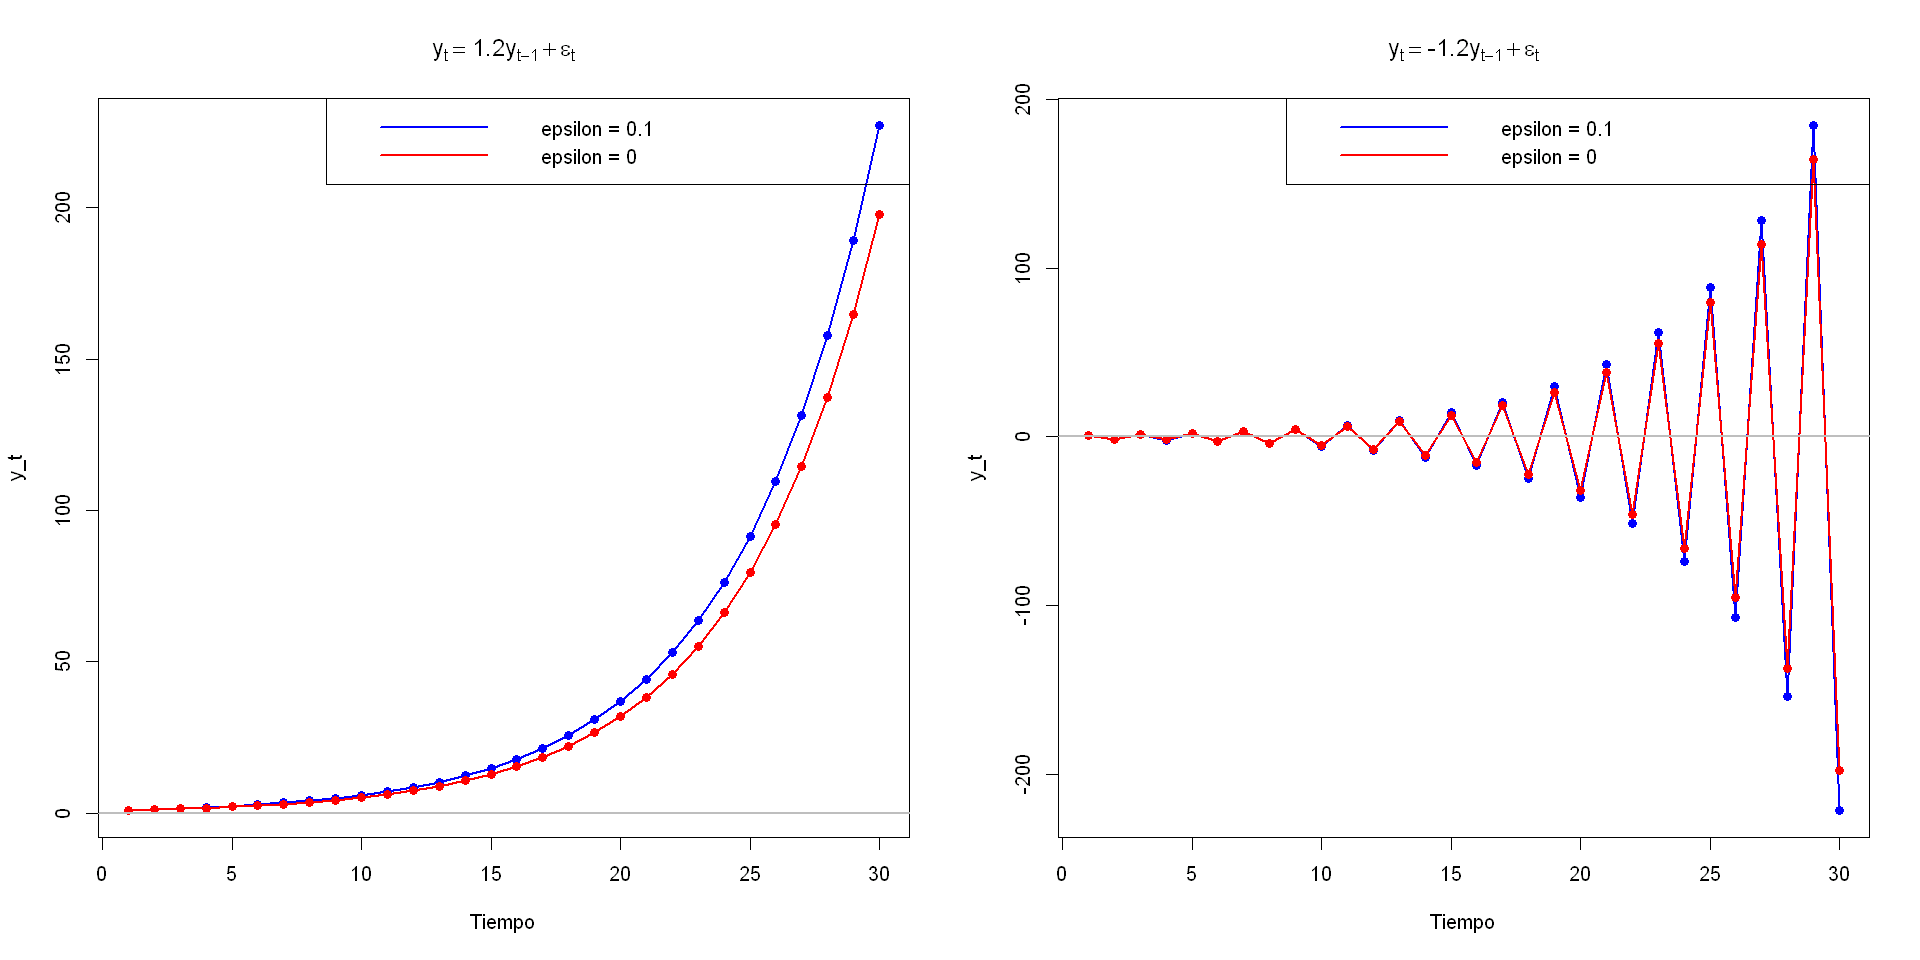

In [33]:
# Comparación de series con diferentes valores de a1
a1_values <- c(1.2, -1.2)
series_list <- list()
series_list2 <- list()

for (a in a1_values) {
    y <- numeric(n)
    y2 <- numeric(n)

    y[1] <- 1
    y2[1] <- 1

    for (t in 2:n) {
        y[t] <- a * y[t - 1] + epsilon[t]
        y2[t] <- a * y2[t - 1] + epsilon2[t]
    }
    series_list[[as.character(a)]] <- y
    series_list2[[as.character(a)]] <- y2
}

# Ajustar tamaño del gráfico
options(repr.plot.width = 16, repr.plot.height = 8)

# Configurar gráficos en 1 fila y 2 columnas
par(mfrow = c(1, 2))

for (a in a1_values) {
    # Crear título
    titulo <- substitute(y[t] == a * y[t - 1] + epsilon[t], list(a = a))

    # Graficar serie 1
    plot(1:n, series_list[[as.character(a)]],
        type = "l",
        main = titulo,
        col = "blue",
        lwd = 2,
        xlab = "Tiempo",
        ylab = "y_t"
    )

    # Graficar serie 2
    lines(1:n, series_list2[[as.character(a)]], col = "red", lwd = 2, lty = 1)

    # Agregar puntos a cada serie
    points(1:n, series_list[[as.character(a)]], pch = 19, col = "blue")
    points(1:n, series_list2[[as.character(a)]], pch = 19, col = "red")

    # Línea horizontal en y = 0
    abline(h = 0, col = "gray", lty = 1, lwd = 2)

    # Agregar leyenda
    legend("topright",
        legend = c("epsilon = 0.1", "epsilon = 0"),
        col = c("blue", "red"), lwd = 2, lty = c(1, 1)
    )
}
